# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [37]:
# import libraries for data reading and manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to telll Python to actually display the graphs
%matplotlib inline


### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [38]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [39]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [40]:
#### Write your code here:
#### df number of row:
df_row = df.shape[0] 
#df number of column
df_columns = df.shape[1]
print(f"For this df data we have: {df_row} rows and {df_columns} colummns.")
#df.info()

For this df data we have: 1898 rows and 9 colummns.


#### Observations:
For this df data we have: 1898 rows and 9 colummns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [41]:
# Use info() to print a concise summary of the DataFrame
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:  for this df data columns we have
##### 4 columns of type int64 :
order_id, customer_id, food_preparation_time, delivery_time are of type int64.
##### 1 column of type float64:
cost_of_the_order
##### 4 columns of type object:
restaurant_name, cuisine_type, day_of_the_week and rating


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [42]:
# Write your code here
# Checking for missing values
print(f"Checking for column missing values count...")
possible_missing_values = df.isnull().sum()
possible_missing_values


Checking for column missing values count...


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [43]:
print(f"Checking for column missing values count...")
df['rating_new'] = pd.to_numeric(df['rating'], errors='coerce')
possible_missing_values = df.isnull().sum()
possible_missing_values

Checking for column missing values count...


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                     0
food_preparation_time      0
delivery_time              0
rating_new               736
dtype: int64

In [19]:
import missingno as msn

<Axes: >

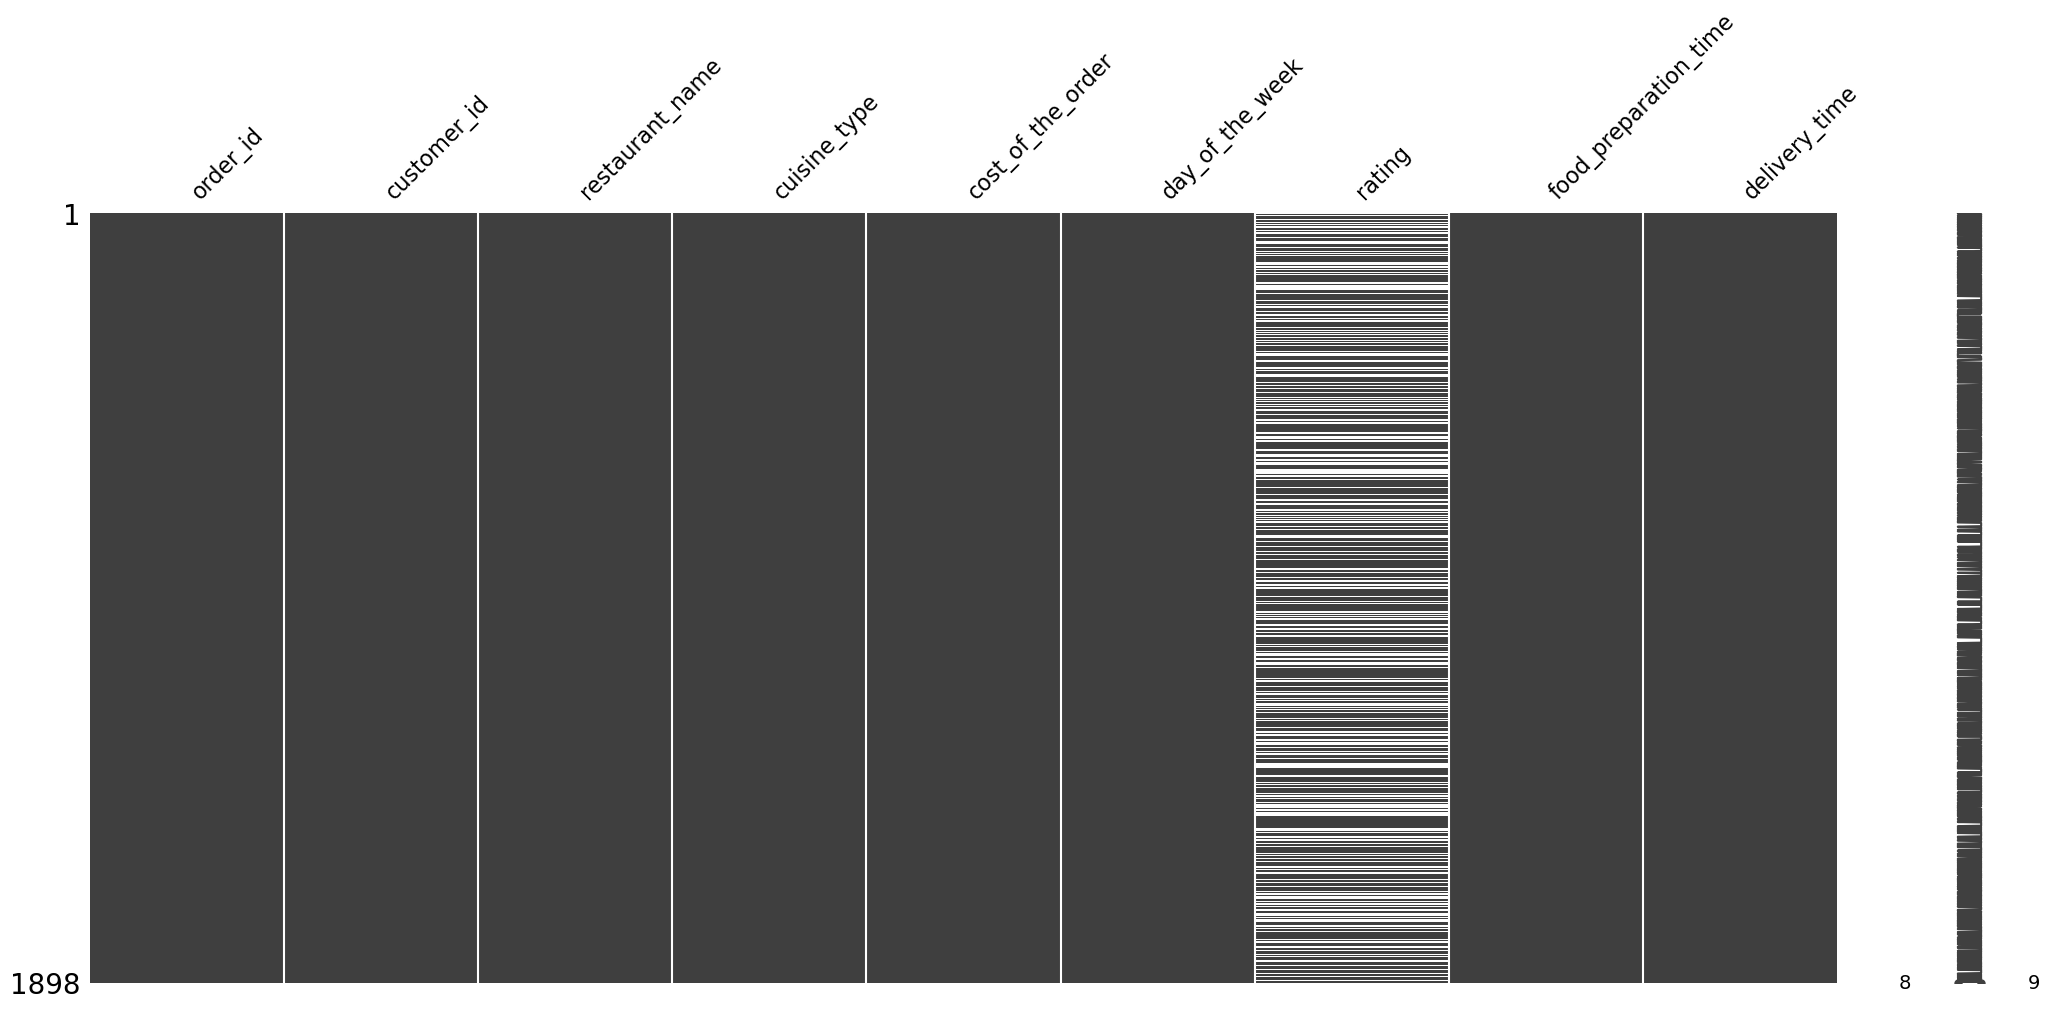

In [35]:
msn.matrix(df)

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [44]:
# Write your code here
df.describe(include='all')


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000,1162.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749,4.344234
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637,0.741478
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000,3.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000,4.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000,5.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000,5.000000


#### Observations:
##### Cost of the order range from round \$4.50 to \$35 while the average cost of order is \$16.50
 Half of the order cost is less than \$15 which indicate the most of the orders are not very costly.
##### The food preparation time ranges from 20 minutes to 35 minutes. The mean and median of the food preparation times are very close to each other ( around 27 minutes)
##### Tdelivery time ranges from form 15 min to 33 minutes. the mean and median of delivery time ave very close to each other (around 24 minutes)

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
df[df['rating']=='Not given'].count()

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64

In [33]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
possible_missing_values = df.isnull().sum()
possible_missing_values

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

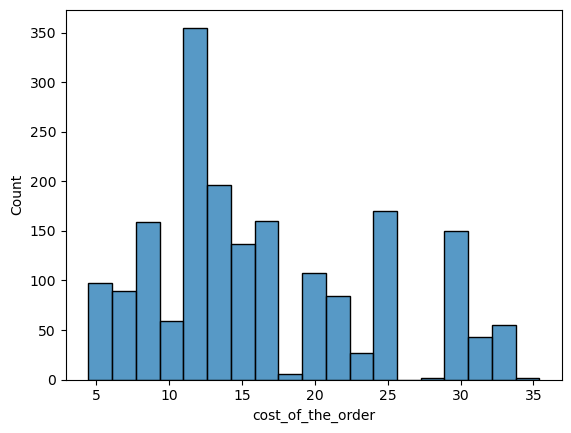

In [10]:
# Write the code here

# Understanding the distribution of cost of order

sns.histplot(data=df, x='cost_of_the_order')

<Axes: xlabel='cost_of_the_order'>

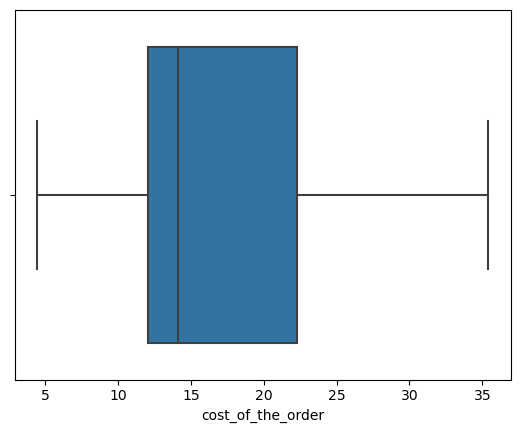

In [11]:
sns.boxplot(data=df, x='cost_of_the_order')

In [12]:
# The cost-of-order is slightly right-skewed.
# Almost half of the customers pay less than $14.50
# 50 % of the the cost of order lie between $12 and $22

<Axes: xlabel='delivery_time', ylabel='Count'>

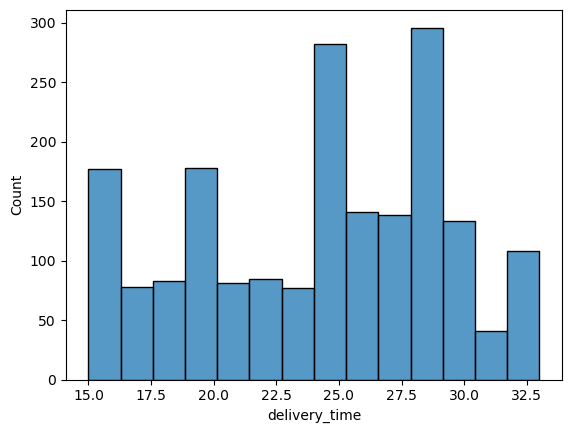

In [13]:
# Understanding the distribution of delivery_time

sns.histplot(data=df, x='delivery_time')

<Axes: xlabel='delivery_time'>

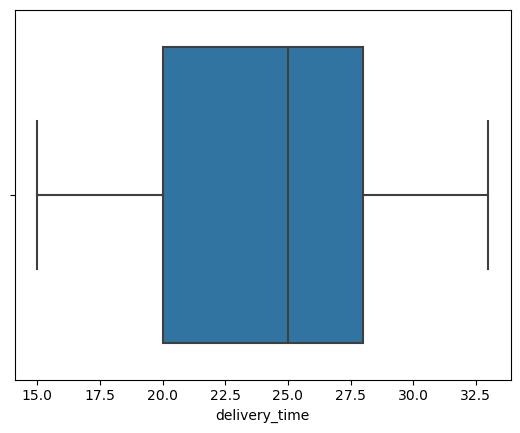

In [14]:
sns.boxplot(data=df, x='delivery_time')

In [15]:
# The delivery time column is slightly left skewed.
# Almost half  of the delivery takes 25 minutes or less
# A50% the delivery takes between 20 minutes and 28 minutes

In [16]:
df.head()
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


In [17]:
# Understand the distributuion food preparation time

<Axes: xlabel='food_preparation_time', ylabel='Count'>

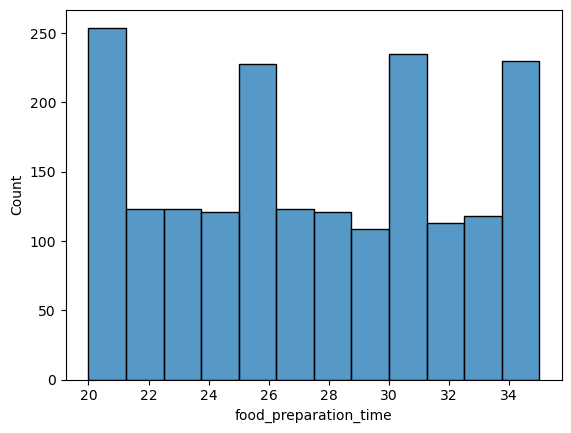

In [18]:
sns.histplot(data=df, x = 'food_preparation_time')

<Axes: xlabel='food_preparation_time'>

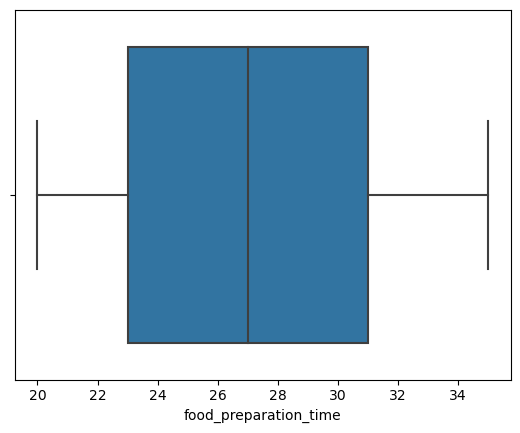

In [19]:
sns.boxplot(data=df, x='food_preparation_time')

In [20]:
# Food preparation time is symetric
# 25% orders take less that 23mn. Another 25% take more than 31 minute 
# 50 % of food preparation time lies between 23 minutes and 33 minutes

<Axes: xlabel='restaurant_name', ylabel='count'>

/Users/stephanenidri/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/Users/stephanenidri/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/Users/stephanenidri/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stephanenidri/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


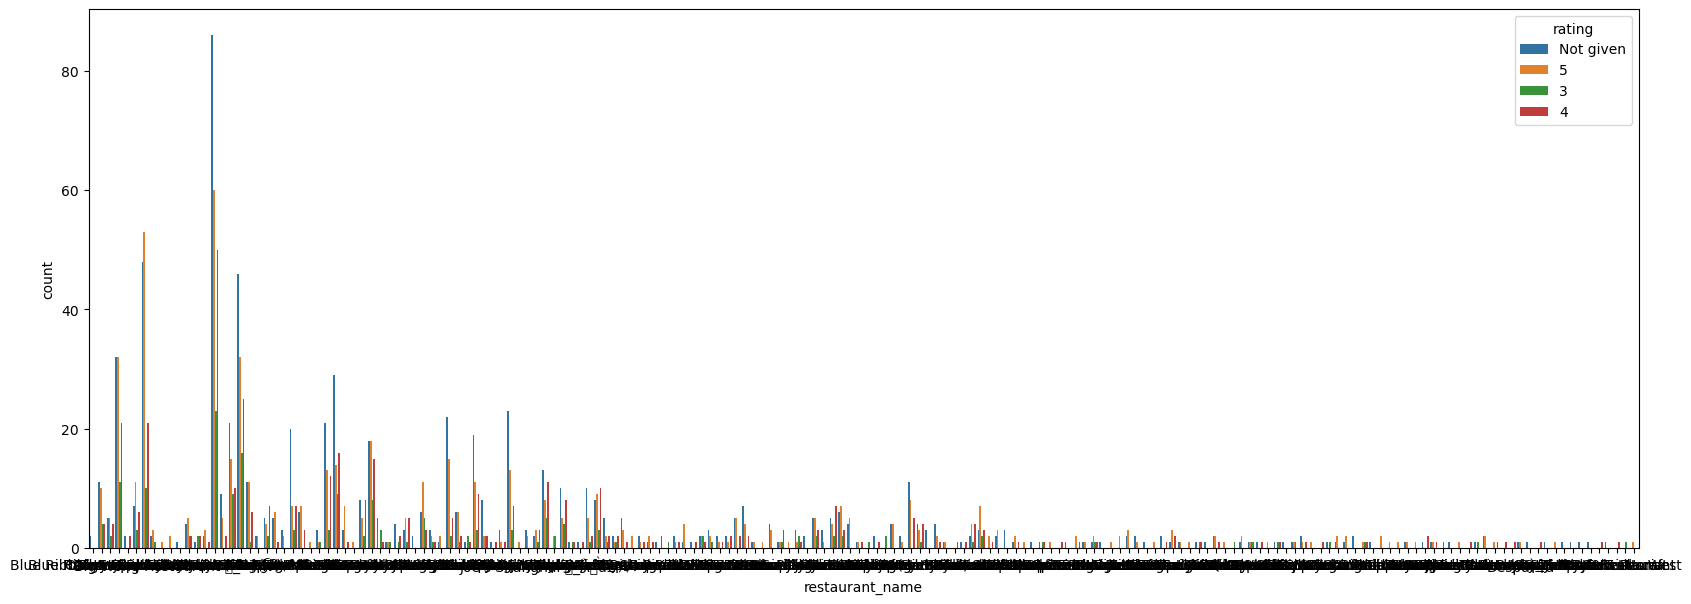

In [21]:
# Understand the distributuion of restaurant_name
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='restaurant_name', hue='rating')

<Axes: xlabel='cuisine_type', ylabel='count'>

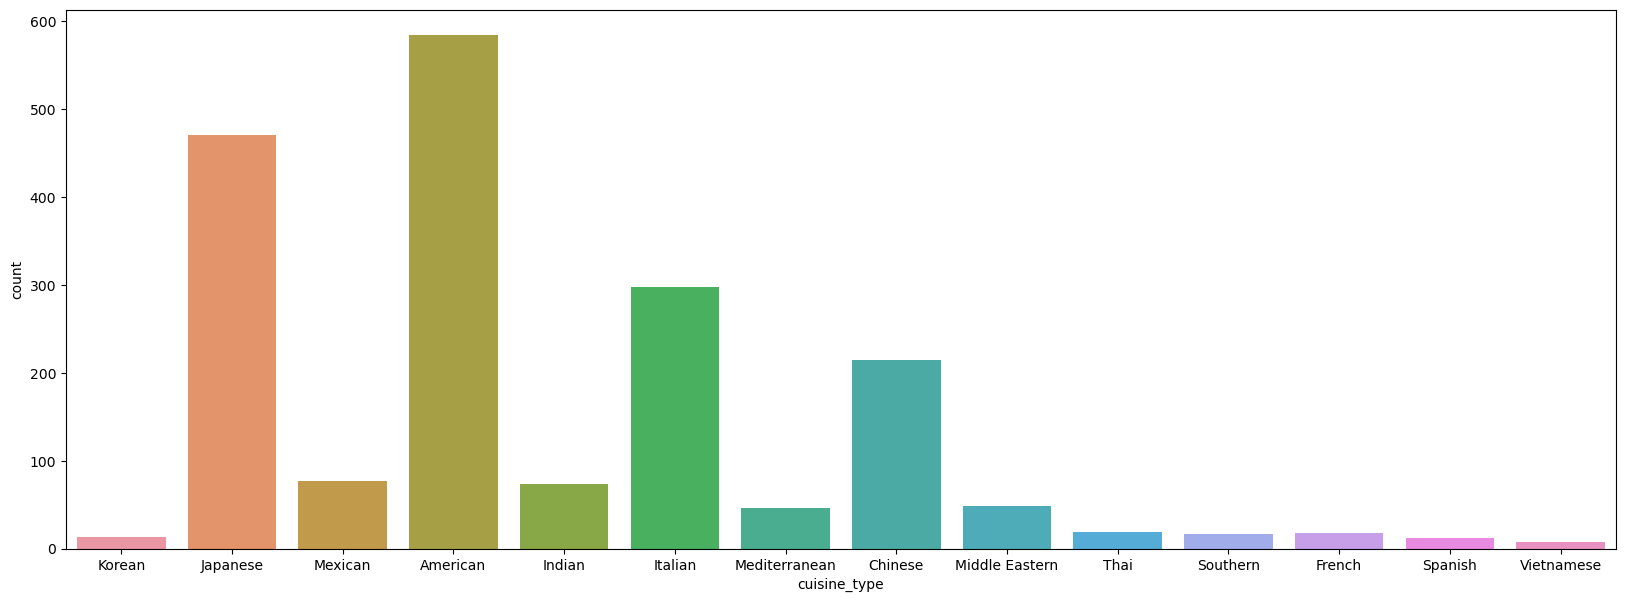

In [22]:
#Understand the distributuion of cuisine_type
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type', )


    Some of the tick marks on the x-axis are overlapping with each other.
    Let's rotate the tick marks to make it look better.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

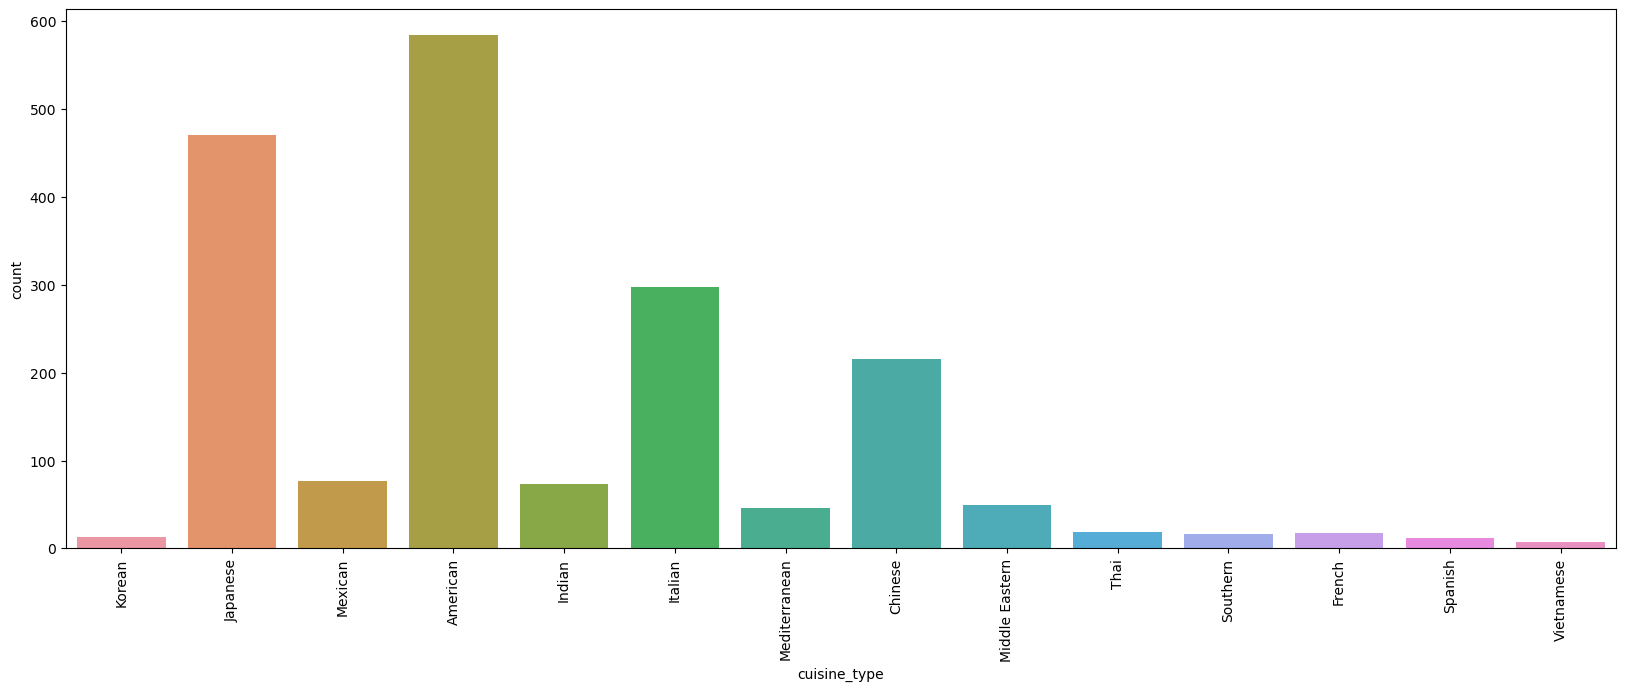

In [23]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)

In [24]:
#Understand the distributuion of day_of_the_week

<Axes: xlabel='day_of_the_week', ylabel='count'>

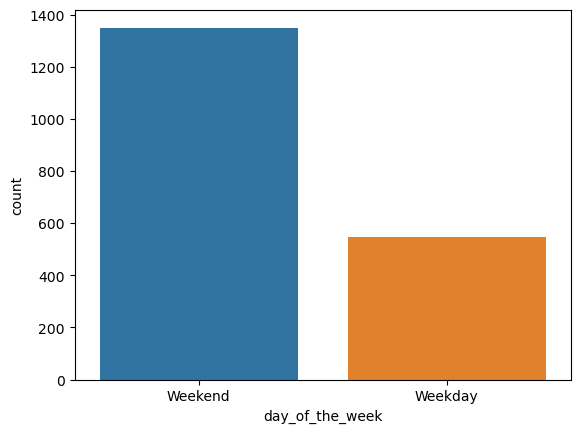

In [25]:
sns.countplot(data=df, x='day_of_the_week')

In [26]:
# The number of orders is more during the weekends than the weekdays
# The number of order over the weekend more than double the number of order over the weekdays

<Axes: xlabel='rating', ylabel='count'>

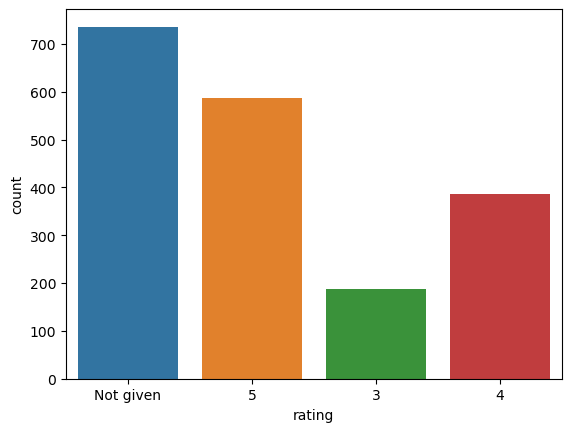

In [27]:
#Understand the distributuion of rating
sns.countplot(data=df, x='rating')

# **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
df['rating'].describe()

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [29]:
# Group by restaurant_name and count orders
restaurants_orders = df['restaurant_name'].value_counts().reset_index()
restaurants_orders.columns = ['restaurant_name', 'order_count']

In [30]:
# sort the restaurants by order count in descending order
restaurants_orders = restaurants_orders.sort_values(by = 'order_count', ascending=False)

In [31]:
# Get the top 5 restaurant
top_5_restaurants = restaurants_orders.head(5)

In [32]:
print(top_5_restaurants)

             restaurant_name  order_count
0                Shake Shack          219
1          The Meatball Shop          132
2          Blue Ribbon Sushi          119
3  Blue Ribbon Fried Chicken           96
4                       Parm           68


In [45]:
restaurants_orders = df['restaurant_name'].value_counts().reset_index()
restaurants_orders.columns = ['restaurant_name', 'order_count']
top5_restaurants= restaurants_orders[['order_count']].sort_values('order_count', ascending=False).reset_index().head(5) #top 10 states producing maximum honey
top5_restaurants

,index,order_count
0,0,219
1,1,132
2,2,119
3,3,96
4,4,68


In [63]:
customers = df['customer_id'].value_counts().reset_index()
customers.columns = ['customer_id', 'order_count']

top5_customers = customers[['customer_id','order_count']].sort_values('order_count', ascending=False).reset_index().head(5)
top5_customers
#customers

,index,customer_id,order_count
0,0,52832,13
1,1,47440,10
2,2,83287,9
3,3,250494,8
4,4,259341,7


In [56]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [33]:
# Write the code here
# Group by cuisine_type and count orders
cuisine_orders = df['cuisine_type'].value_counts().reset_index()
cuisine_orders.columns = ['cuisine_type', 'order_count']

In [34]:
# sort the cuisine_type by order count in descending order
cuisine_orders = cuisine_orders.sort_values(by = 'order_count', ascending=False)

In [35]:
# Get the top 5 restaurant
top_5_cuisine = cuisine_orders.head(5)

In [36]:
print(top_5_cuisine)

  cuisine_type  order_count
0     American          584
1     Japanese          470
2      Italian          298
3      Chinese          215
4      Mexican           77


#### Observations:
##### The most popular cuisine on weekends is 'American' cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [49]:
# Write the code here
df['cost_of_the_order'].describe()


count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

<Axes: xlabel='cost_of_the_order'>

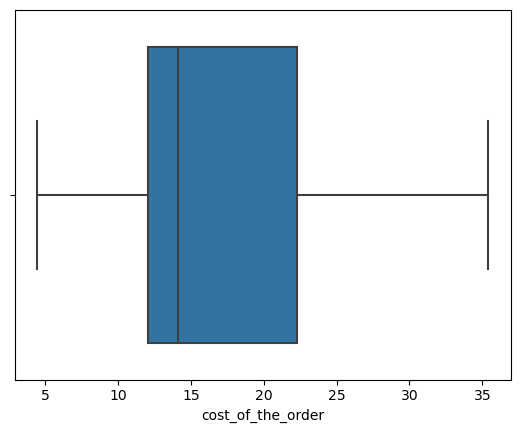

In [50]:
sns.boxplot(data=df, x='cost_of_the_order')

In [52]:
cost_above_20_dollar = df[df['cost_of_the_order'] > 20]
#percentage of order that have cost more than $20
percentage_order_above_20 = (len(cost_above_20_dollar)/len(df)) * 100
print(f"The percentage of the orders cost more than 20 dollars is: {percentage_order_above_20:.2f}%")

The percentage of the orders cost more than 20 dollars is: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [55]:
# Write the code here
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:
#### The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [65]:
# Write the code here
customers = df['customer_id'].value_counts().reset_index()
customers.columns = ['customer_id', 'order_count']

top3_customers = customers[['customer_id','order_count']].sort_values('order_count', ascending=False).reset_index().head(3)
top3_customers
#customers

,index,customer_id,order_count
0,0,52832,13
1,1,47440,10
2,2,83287,9


#### Observations:
##### Customer '52832' has placed 13 orders
##### Customer '47440' has placed 10 orders
##### Customer '83287' has placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [96]:
# Write the code here

class FullCodeUtils:
    # @param {object[]}ratings 1D array
    # Calulate the total rating of the array
    # @return {float}
    def sumArrayRating(self, ratings):
        total_rating = 0
        for r in ratings:
            total_rating += int(r)
        return total_rating
    
    # @param array_cost_orders 1D array
    # Net revenue generated
    # @param return {float} net_revenue
    def netRevenueGenerated(self, array_cost_orders):
        total_revenue = 0
        total_charges = 0
        
        # here we define the charging rates
        rate1 = .25 # 25%
        rate2 = .15 # 15%
        
        # Iterates through the orders and calculate chages and revenue
        for order_cost in array_cost_orders:
            if order_cost > 20:
                charges = order_cost*rate1
            elif order_cost > 15:
                charges = order_cost*rate2
            else:
                charges = 0
            revenue = order_cost - charges
            
            total_revenue += revenue
            total_charges += charges
        # Compute the net revenue
        net_revenue = total_revenue - total_charges
        return net_revenue

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [67]:
# Write the code here
df['rating'].describe(include='all')

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [68]:
df[df['rating'] != 'Not given'].describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.162000e+03,1162.000000,1162,1162,1162.000000,1162,1162,1162.000000,1162.000000
unique,NaN,NaN,156,14,NaN,2,3,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,5,NaN,NaN
freq,NaN,NaN,133,368,NaN,822,588,NaN,NaN
mean,1.477520e+06,171939.471601,NaN,NaN,16.760766,NaN,NaN,27.381239,24.154045
std,5.468713e+02,114551.215031,NaN,NaN,7.572578,NaN,NaN,4.677922,4.930999
min,1.476547e+06,5139.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477062e+06,77540.000000,NaN,NaN,12.130000,NaN,NaN,23.000000,20.000000
50%,1.477524e+06,128655.500000,NaN,NaN,14.600000,NaN,NaN,27.000000,25.000000
75%,1.477992e+06,276066.250000,NaN,NaN,22.750000,NaN,NaN,32.000000,28.000000


In [91]:
ratings = df[df['rating'] != 'Not given']['rating']
rating_count = len(ratings)
myUtil = FullCodeUtils()
rating_avg = myUtil.sumArrayRating(ratings)/rating_count
rating_avg



#df = df[df['rating'] != 'Not given']
#df.info()
#sns.boxplot(data=df, x='rating')

4.344234079173838

In [146]:
df = df[df['rating'] != 'Not given']
rating_values = df['rating'].apply(lambda x: int(x))
df['rating_value'] = rating_values


df_with_ratings = df[df['rating'] != 'Not given']

restaurants = df_with_ratings['restaurant_name'].value_counts().reset_index()
restaurants.columns = ['restaurant_name', 'order_count']
#restaurants

#grouped = df.groupby('restaurant')['rating'].mean()
#apply(lambda x: x + df['column2'])
rating_values = df_with_ratings['rating'].apply(lambda x: int(x))
df_with_ratings['rating_value'] = rating_values
#df_with_ratings

groupedb = (df.groupby('restaurant_name')['rating_value'].mean().reset_index())
groupedb.columns = ['restaurant_name', 'average_rating']

groupeda = df.groupby('restaurant_name').value_counts().reset_index()
grouped1 = (df_with_ratings['restaurant_name'].value_counts().reset_index())
grouped2 = df['restaurant_name'].value_counts().reset_index()
grouped1.head(5)
groupedb.sort_values(by='restaurant_name', ascending=False)
#f_with_ratings['rating_value'].mean()
#df2 = pd.DataFrame({'restaurant_name':restaurants['restaurant_name'],'order_count':restaurants['order_count'], })
#df2
#top3_customers = customers[['customer_id','order_count']].sort_values('order_count', ascending=False).reset_index()

,restaurant_name,average_rating
155,indikitch,4.500000
154,ilili Restaurant,4.153846
153,da Umberto,5.000000
152,brgr,3.000000
151,Zero Otto Nove,4.000000
...,...,...
4,Amma,4.500000
3,67 Burger,5.000000
2,5 Napkin Burger,4.000000
1,12 Chairs,4.500000


In [148]:
restaurants.sort_values(by='restaurant_name', ascending=False)

,restaurant_name,order_count
102,indikitch,2
20,ilili Restaurant,13
142,da Umberto,1
129,brgr,1
145,Zero Otto Nove,1
...,...,...
92,Amma,2
111,67 Burger,1
73,5 Napkin Burger,2
87,12 Chairs,2


In [149]:
avgdf = groupedb.sort_values(by='restaurant_name', ascending=False)
restaurants['average_rating'] = avgdf['average_rating']
restaurants

,restaurant_name,order_count,average_rating
0,Shake Shack,133,5.000000
1,The Meatball Shop,84,4.500000
2,Blue Ribbon Sushi,73,4.000000
3,Blue Ribbon Fried Chicken,64,5.000000
4,RedFarm Broadway,41,4.500000
...,...,...,...
151,Philippe Chow,1,4.000000
152,Dirty Bird To Go (archived),1,3.000000
153,The MasalaWala,1,5.000000
154,Kambi Ramen House,1,4.153846


In [157]:
promotional_restaurants = restaurants[restaurants['order_count']>50]
promotional_restaurants = restaurants[restaurants['average_rating']>4]

promotional_restaurants = restaurants[(restaurants['order_count']>50) & (restaurants['average_rating']>4)]
promotional_restaurants

,restaurant_name,order_count,average_rating
0,Shake Shack,133,5.0
1,The Meatball Shop,84,4.5
3,Blue Ribbon Fried Chicken,64,5.0


df['rating'].mode()

In [73]:
filtered_df = df[df['rating'].isna()]
filtered_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [98]:
# Write the code here

myUtil = FullCodeUtils()
array_order_costs = df['cost_of_the_order']
total_revenue = myUtil.netRevenueGenerated(array_order_costs)
print(f"The net revenue generated by the company across all orders: ${total_revenue:.2f}")


The net revenue generated by the company across all orders: $13665.48


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [158]:
# Write the code here
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_value
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,3
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,3
...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,3
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,5
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,5


<Axes: xlabel='delivery_time'>

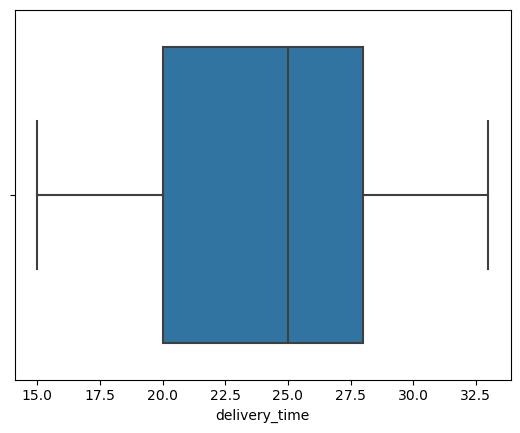

In [165]:
sns.boxplot(data=df, x='delivery_time')

In [166]:
df[df['delivery_time'] > 60]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_value


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---